# Análise de dados do dataset ["Lung Cancer"](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer)

Este dataset é disponibilizado gratuitamente pela [Kaggle](https://www.kaggle.com/) e escolhido por mim (Fábio Mori) para aplicar o aprendizado do módulo 5 do curso de pós graduação da [Tera](https://somostera.com/) de [Data Science](https://somostera.com/cursos/data-science-machine-learning).

## Sobre o "Lung Cancer"

Este dataset fornece uma série de características de pacientes que foram ou não diagnosticados com câncer de pulmão. Estes dados podem ajudar no desenvolvimento de sistemas que ajudam a calcular o risco de um paciente, dado suas características, deseenvolver este tipo de doença. O conhecimento dos riscos pode ser uma ótima ferramenta para prevenções e conscientizações sobre os cuidados com a saúde de cada um.

## Objetivo do estudo

O objetivo deste trabalho é desenvolver um sistema de calcule as características mais comuns em paciêntes diagnosticados com câncer de pulmão, calculando o percentual de paciêntes diagnosticados para cada característica apresentada no data set. 

No final do trabalho, o objetivo é aprensetam uma lista ordena com as características com maior percentual presente nos casos diagnosticados, como também uma lista ordenada pela quantidade em que essas características apareceram nestes pacientes.

## Dicionário do dataset

Quantidade de dados: 309
Quantidade de características: 16

- Gender: M(male), F(female).
  - Gênero: M(masculino), F(feminino).
- Age: Age of the patient.
  - Idade: idade do paciente.
- Smoking: YES=2, NO=1.
  - Fumante: SIM=2, NÃO=1.
- Yellow fingers: YES=2, NO=1.
  - Dedos amarelos: SIM=1, NÃO=1.
- Anxiety: YES=2, NO=1.
  - Ansiedade: SIM=1, NÃO=1
- Peer_pressure: YES=2, NO=1.
  - O termo "peer pressure" significa um sentimento de que se deve fazer as mesmas coisas que outras pessoas de sua idade e grupo social para ser amado ou respeitado por elas (ver [link](https://www.merriam-webster.com/dictionary/peer%20pressure)): SIM=2, NÃO=1.
- Chronic Disease: YES=2, NO=1.
  - Doença crônica: SIM=2, NÃO=1
- Fatigue: YES=2, NO=1
  - Fadiga: SIM=2, NÃO=1
- Allergy: YES=2, NO=1
  - Alergia: SIM=2, NÃO=1
- Wheezing: YES=2, NO=1.
  - Sibilos: Os sibilos são sons ou ruídos respiratórios auscultados (ouvidos com auxílio do estetoscópio) ao exame físico ou relatados pelo paciente. Popularmente, são descritos como chiado no peito, piado, pieira ou miado de gato (ve [link](https://www.rededorsaoluiz.com.br/doencas/sibilos)): SIM=2, NÃO=1.
- Alcohol Consuming: YES=2, NO=1.
  - Consumo de álcool: SIM=2, NÃO=1.
- Coughing: YES=2, NO=1.
  - Tosse: SIM=2, NÃO=1.
- Shortness of Breath: YES=2, NO=1.
  - Falta de ar: SIM=2, NÃO=1.
- Swallowing Difficulty: YES=2, NO=1.
  - Dificuldade de deglutição(engolir): SIM:2, NÃO=1.
- Chest pain: YES=2, NO=1.
  - Dor no peito: SIM=2, NÃO=1.
- Lung Cancer: YES, NO.
  - Cancer no pulmão: SIM, NÃO.

## Inicializando e tratamento inicial dos dados 

A primeira coisa a se fazer é importar as bibliotecas e ler o arquivo de dados .csv

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando o dado em .csv para o código em Python através da função read_csv da biblioteca Pandas
df = pd.read_csv('survey lung cancer.csv')

Com o arquivo de dados .csv já transformado em dataset, vamos conhecer o nosso arquivo através de algumas funções

In [3]:
# Conhecendo as 5 primeiras linhas do dataframe
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Extraindo informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Agora vamos traduzir algumas informações das colunas para facilitar o nosso tratamento de dados.

In [5]:
df.rename(columns = {'GENDER':'Gênero'}, inplace = True)
df.rename(columns = {'AGE':'Idade'}, inplace = True)
df.rename(columns = {'SMOKING':'Fumante'}, inplace = True)
df.rename(columns = {'YELLOW_FINGERS':'Dedos_Amarelos'}, inplace = True)
df.rename(columns = {'ANXIETY':'Ansiedade'}, inplace = True)
df.rename(columns = {'PEER_PRESSURE':'Pressão_Pares'}, inplace = True)
df.rename(columns = {'CHRONIC DISEASE':'Doença_Crônica'}, inplace = True)
df.rename(columns = {'FATIGUE ':'Fadiga'}, inplace = True)
df.rename(columns = {'ALLERGY ':'Alergia'}, inplace = True)
df.rename(columns = {'WHEEZING':'Sibilos'}, inplace = True)
df.rename(columns = {'ALCOHOL CONSUMING':'Consumo_Alcool'}, inplace = True)
df.rename(columns = {'COUGHING':'Tosse'}, inplace = True)
df.rename(columns = {'SHORTNESS OF BREATH':'Falta_Ar'}, inplace = True)
df.rename(columns = {'SWALLOWING DIFFICULTY':'Dificuldade_Engolir'}, inplace = True)
df.rename(columns = {'CHEST PAIN':'Dor_Peito'}, inplace = True)
df.rename(columns = {'LUNG_CANCER':'Cancer_Pulmão'}, inplace = True)

In [6]:
# Conferindo como ficou o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gênero               309 non-null    object
 1   Idade                309 non-null    int64 
 2   Fumante              309 non-null    int64 
 3   Dedos_Amarelos       309 non-null    int64 
 4   Ansiedade            309 non-null    int64 
 5   Pressão_Pares        309 non-null    int64 
 6   Doença_Crônica       309 non-null    int64 
 7   Fadiga               309 non-null    int64 
 8   Alergia              309 non-null    int64 
 9   Sibilos              309 non-null    int64 
 10  Consumo_Alcool       309 non-null    int64 
 11  Tosse                309 non-null    int64 
 12  Falta_Ar             309 non-null    int64 
 13  Dificuldade_Engolir  309 non-null    int64 
 14  Dor_Peito            309 non-null    int64 
 15  Cancer_Pulmão        309 non-null    object
dtypes: int64

In [7]:
# Verificando se existem dados nulos no dataset
df.isna().mean()*100

Gênero                 0.0
Idade                  0.0
Fumante                0.0
Dedos_Amarelos         0.0
Ansiedade              0.0
Pressão_Pares          0.0
Doença_Crônica         0.0
Fadiga                 0.0
Alergia                0.0
Sibilos                0.0
Consumo_Alcool         0.0
Tosse                  0.0
Falta_Ar               0.0
Dificuldade_Engolir    0.0
Dor_Peito              0.0
Cancer_Pulmão          0.0
dtype: float64

**Não existem dados nulos neste dataset**

In [8]:
# Vamos alterar os valores 2=SIM e 1=NÃO para 1=SIM e 0=NÃO (para facilitar a vizualização das contas posteriormente)
df=df.replace(1,0)
df=df.replace(2,1)

In [9]:
# Vamos alterar a coluna 'Cancer_Pulmão' de "YES" e "NO" para "1" e "O", transformando o objeto em um inteiro (para
# utilizar esta coluna nos cálculos estatísticos posteriormente)
df=df.replace('NO',0)
df=df.replace('YES',1)

In [10]:
# criando outro dataset para os dados de casos confirmados
com_diagnostico = df[df.Cancer_Pulmão==1]
com_diagnostico

,Gênero,Idade,Fumante,Dedos_Amarelos,Ansiedade,Pressão_Pares,Doença_Crônica,Fadiga,Alergia,Sibilos,Consumo_Alcool,Tosse,Falta_Ar,Dificuldade_Engolir,Dor_Peito,Cancer_Pulmão
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
5,F,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,M,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,F,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,M,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,M,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,M,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [11]:
#separando os dados de casos não confirmados
sem_diagnostico = df[df.Cancer_Pulmão==0]
sem_diagnostico

,Gênero,Idade,Fumante,Dedos_Amarelos,Ansiedade,Pressão_Pares,Doença_Crônica,Fadiga,Alergia,Sibilos,Consumo_Alcool,Tosse,Falta_Ar,Dificuldade_Engolir,Dor_Peito,Cancer_Pulmão
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
8,F,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
12,F,60,1,0,0,0,0,1,0,0,0,0,1,0,0,0
14,M,69,1,0,0,0,0,0,1,1,1,1,0,0,1,0
19,F,61,0,0,0,0,1,1,0,0,0,0,1,0,0,0
22,F,21,1,0,0,0,1,1,1,0,0,0,1,0,0,0
27,M,69,0,0,0,1,0,1,0,1,0,1,1,0,1,0
29,M,55,0,1,0,0,0,1,0,1,1,1,1,0,0,0


## Teste de Hipóteses

In [12]:
#Teste de hipóteses
#H1: percentual de fumantes com câncer de pulmão é maior que o percentual de não fumantes com cancer de pulmão
#H0: percentual de fumantes com câncer de pulmão não é maior que o percentual de não fumantes com cancer de pulmão 

# Parte 1: Calculando os percentuais a partir dos dados
perc_fumante_diagnosticado = float(round(100*(com_diagnostico.Fumante[com_diagnostico['Fumante']==1].value_counts()/len(com_diagnostico.index)),2))
perc_naofumante_diagnosticado = float(round(100*(com_diagnostico.Fumante[com_diagnostico['Fumante']==0].value_counts()/len(com_diagnostico.index)),2))

# Parte 2: Fazendo os cálculos para rejeitar ou aceitar a hipótese de negação H0
hipotese_zero=perc_fumante_diagnosticado-perc_naofumante_diagnosticado
if hipotese_zero>0:
  print("H0 é rejeitada")
else:
  print("H0 não é rejeitada")


H0 é rejeitada


In [13]:
# Teste A/B
# Público A: Fumantes que bebem
# Público B: Fumantes que não bebem

# O teste tem o objetivo de identificar se o consumo de álcool potencializou os casos de câncer de pulmão em fumantes.
# Parte 1: Calculando os percentuais a partir dos dados
per_fumantes_bebem = len(com_diagnostico.query('Fumante==1 and Consumo_Alcool==1'))/len(com_diagnostico.index)
grupoA=per_fumantes_bebem
per_fumantes_nao_bebem = len(com_diagnostico.query('Fumante==1 and Consumo_Alcool==0'))/len(com_diagnostico.index)
grupoB=per_fumantes_nao_bebem

# Parte 2: Fazendo os cálculos para ver qual grupo apresentou os maiores resultados
hip_AB=grupoA-grupoB
if hip_AB>0:
  print("Grupo A (fumantes que bebem) teve mais casos de câncer de pulmão")
else:
  print("Grupo B (fumantes que não bebem) teve mais casos de câncer de pulmão")

Grupo A (fumantes que bebem) teve mais casos de câncer de pulmão


## Análise de dados

In [14]:
# Análise estatísticas das variáveis numéricas dos pacientes diagnosticados com câncer de pulmão
com_diagnostico.describe()

,Idade,Fumante,Dedos_Amarelos,Ansiedade,Pressão_Pares,Doença_Crônica,Fadiga,Alergia,Sibilos,Consumo_Alcool,Tosse,Falta_Ar,Dificuldade_Engolir,Dor_Peito,Cancer_Pulmão
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0
mean,62.951852,0.574074,0.603704,0.525926,0.537037,0.525926,0.700000,0.618519,0.603704,0.611111,0.625926,0.651852,0.518519,0.592593,1.0
std,7.966560,0.495401,0.490036,0.500255,0.499552,0.500255,0.459109,0.486652,0.490036,0.488403,0.484781,0.477268,0.500585,0.492264,0.0
min,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,62.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


Podemos observar alguns dados interessantes como:
- Média de idade de quase 63 anos.
- O paciente mais velho tem 81 anos e o mais novo, 38.
- Todas as médias são maiores que 50%, ou seja, a maioria dos paciêntes relataram como "SIM" para as características apresentadas.

In [15]:
# Análise estatísticas das variáveis numéricas dos pacientes diagnosticados sem câncer de pulmão
sem_diagnostico.describe()

,Idade,Fumante,Dedos_Amarelos,Ansiedade,Pressão_Pares,Doença_Crônica,Fadiga,Alergia,Sibilos,Consumo_Alcool,Tosse,Falta_Ar,Dificuldade_Engolir,Dor_Peito,Cancer_Pulmão
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,60.743590,0.487179,0.333333,0.307692,0.256410,0.358974,0.487179,0.128205,0.230769,0.179487,0.256410,0.564103,0.128205,0.307692,0.0
std,9.629226,0.506370,0.477567,0.467572,0.442359,0.485971,0.506370,0.338688,0.426833,0.388776,0.442359,0.502356,0.338688,0.467572,0.0
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,65.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.0
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


Podemos observar alguns dados interessantes como:
- Média de idade de quase 61 anos, muito próxima aos pacientes que foram diagnosticados com câncer de pulmão.
- A idade mínima de 21 anos é 17 anos menor que em relação ao paciente mais novo diagnosticado com câncer de pulmão.
- O paciente mais velho de todo dataset não foi diagnosticado com câncer.
- Todas as médias são menores que 50%, sendo 'Alergia' e 'Consudo de Álcool' as características com os menores percentuais.

In [16]:
# Percentual de homens e mulheres no dataset completo
df.Gênero.value_counts(normalize=True)

M    0.524272
F    0.475728
Name: Gênero, dtype: float64

A maioria dos pacientes, **52%**, são homens.

In [17]:
# Percentual de pacientes diagnosticados com câncer de pulmão no dataset completo
df.Cancer_Pulmão.value_counts(normalize=True)

1    0.873786
0    0.126214
Name: Cancer_Pulmão, dtype: float64

A grande maioria dos pacientes (**87,4%**) foram diagnosticados com câncer de pulmão.

In [18]:
# Percentual de pacientes com câncer de pulmão que são fumantes e não fumantes
df.groupby('Fumante')['Cancer_Pulmão'].mean() 

Fumante
0    0.851852
1    0.890805
Name: Cancer_Pulmão, dtype: float64

**89%** dos pacientes fumantes foram diagnosticados com câncer de pulmão, entre os não fumantes, o índice é **85,2%**.

In [19]:
# Percentual de pacientes com câncer de pulmão que tem e não tem ansiedade
df.groupby('Ansiedade')['Cancer_Pulmão'].mean() 

Ansiedade
0    0.825806
1    0.922078
Name: Cancer_Pulmão, dtype: float64

**92,2%** dos pacientes com ansiedade foram diagnosticados com câncer de pulmão, entre os não ansiosos, o índice é **82,6%**.

In [20]:
# Percentual de pacientes com câncer de pumlão que tem ou não dedos amarelados
df.groupby('Dedos_Amarelos')['Cancer_Pulmão'].mean() 

Dedos_Amarelos
0    0.804511
1    0.926136
Name: Cancer_Pulmão, dtype: float64

**92,6%** dos pacientes com dedos amarelos foram diagnosticados com câncer de pulmão, entre os que não possuem dedos amarelos, o índice é **80,5%**.

## Gráficos

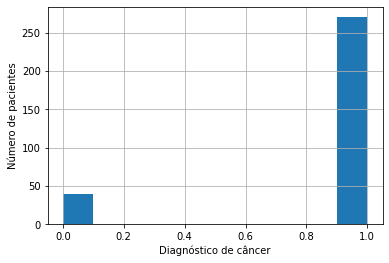

In [21]:
# Representação gráfica (histograma) dos pacientes diagnosticados com câncer de pulmão no dataset completo
df.Cancer_Pulmão.hist()
plt.xlabel('Diagnóstico de câncer')
plt.ylabel('Número de pacientes')
plt.show()

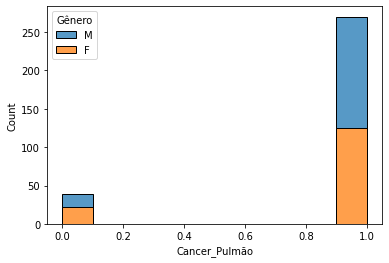

In [22]:
# Histograma dos pacientes diagnosticados com câncer de pulmão no dataset completo + representação de gênero de cada um.
sns.histplot(data=df, x="Cancer_Pulmão", hue="Gênero", multiple="stack")

Podemos observar que embora existam diferenças percentuais entre os gênetros 'masculino' e 'feminino', por este gráfico **não podemos concluir que exista uma predominância ou relação** entre os pacientes diagnosticados com câncer e seu gênero.

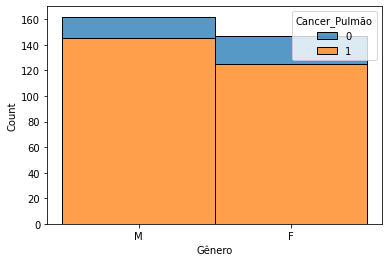

In [23]:
# Histograma do gênero dos pacientes no dataset completo + diagnóstico positivo ou não de câncer de pulmão.
sns.histplot(data=df, x="Gênero", hue="Cancer_Pulmão", multiple="stack")

Este gráfico novamente nos mostra que a grande maioria dos pacientes, masculino e feminino, deste dataset, foram diagnosticados com câncer de pulmão, mas que **não existe uma tendência dos pacientes diagnisticados ou não, sejam predominante do gênero masculino ou feminino**.

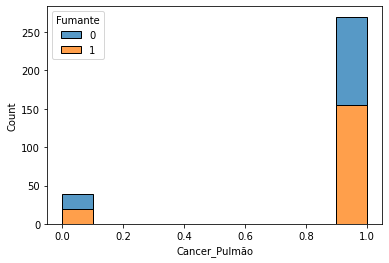

In [24]:
# Histograma dos pacientes diagnosticados com câncer de pulmão no dataset completo + divisão entre fumantes e não fumantes.
sns.histplot(data=df, x="Cancer_Pulmão", hue="Fumante", multiple="stack")

Para os dados deste dataset, não podemos observar uma forte relação entre a característica 'Fumante' ser mais presente nos casos de diagnóstico positivo ou não. Embora, podemos observar que o percentual de fumantes é predominante nos casos positivos (assim como visto na tabela de análise estatística).

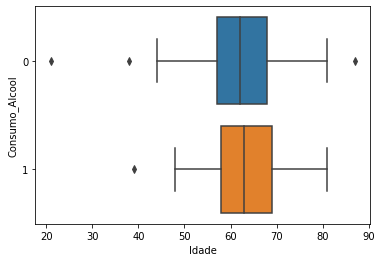

In [25]:
# Um boxplot entre o consumo de álcool e a idade dos pacientes para extrair informações
sns.boxplot(
    data=df, # Dataframe utilizado
    x='Idade', # Variável no eixo x
    y='Consumo_Alcool', # Variável no eixo y
    orient='h' # h -> horizontal, v -> vertical
)
plt.show()

Um ponto que podemos observar é que a média de idade dos pacientes que consomem álcool é pouco maior em relação aos que não consomem. O primeiro quartil dos que consomem álcool é menor em relação aos que não consomem, que indica que os pacientes mais novos do dataset não consomem álcool.

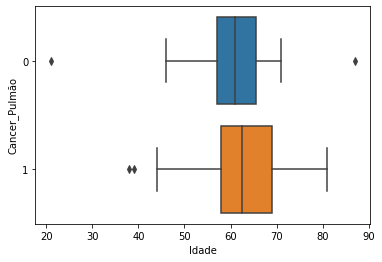

In [26]:
# Um boxplot entre o diagnóstico de câncer e a idade dos pacientes para extrair informações
sns.boxplot(
    data=df, # Dataframe utilizado
    x='Idade', # Variável no eixo x
    y='Cancer_Pulmão', # Variável no eixo y
    orient='h' # h -> horizontal, v -> vertical
)
plt.show()

Um ponto que podemos observar é que o último quartil dos pacientes que não foram diagnosticados com câncer de pulmão é consideravelmente menor que os pacientes que foram diagnosticados. A média de idade dos pacientes diagnosticados é maior em relação aos que não foram diagnosticados e os outliers, paciente mais novo e o mais velho, ambos não foram diagnosticados com câncer de pulmão.

## Correlação entre as características

In [27]:
# Através da função '.corr()' vamos descobrir se existem correlações, positivas ou negativas, entre as características
df.corr()

,Idade,Fumante,Dedos_Amarelos,Ansiedade,Pressão_Pares,Doença_Crônica,Fadiga,Alergia,Sibilos,Consumo_Alcool,Tosse,Falta_Ar,Dificuldade_Engolir,Dor_Peito,Cancer_Pulmão
Idade,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
Fumante,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
Dedos_Amarelos,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
Ansiedade,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
Pressão_Pares,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
Doença_Crônica,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
Fadiga,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
Alergia,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
Sibilos,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300
Consumo_Alcool,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533


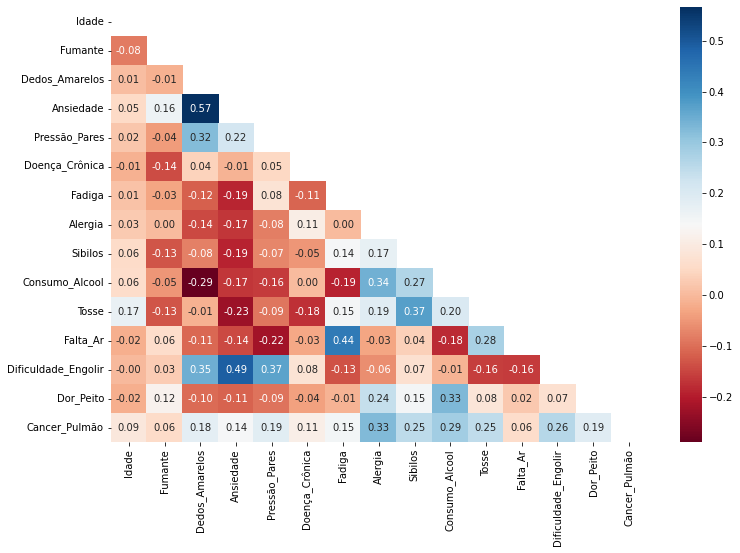

In [28]:
# Para vizualizar melhor as correlações vamos plotar a matriz de correlações usando um Heatmap para dar cor aos números
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(df.corr())))
plt.show()

A nossa variável de interesse é **Câncer de Pulmão**, portanto é essa linha (última neste caso) que devemos analisar. Alguns pontos importantes observados:
- Todas as variáveis possuem coeficientes positivos, indicando que, não temos nenhuma correlação negativa entre o diagnóstico e as variáveis apresentadas.
- 'Idade', 'Fumante' e 'Falta de Ar' são características que apresentaram uma correlação muito baixa com o diagnóstico.
- 'Alergia', 'Consumo de Álcool', 'Dificuldade de Engolir' e 'Sibilos' foram as características que apresentaram maior correlação positiva com o diagnóstico.

## Análise final das características mais importantes

Passo a passo da criação de uma função que vai calcular uma lista com as características mais importantes em relação ao diagnóstico de câncer de pulmão. A variável **Ansiedade** será utilizada durante o desenvolvimento da função.

In [29]:
# Parte 1: Agrupar os dados
df_agrupado = df.groupby('Ansiedade')['Cancer_Pulmão'].agg(['count','mean'])
df_agrupado.columns = ['Contagem','diagnóstico positivo']
df_agrupado

,Contagem,diagnóstico positivo
Ansiedade,,
0,155,0.825806
1,154,0.922078


In [35]:
# Parte 2: Filtrar os dados por quantidade mínima de diagnósticos com ou sem essa característica
minimo_diagnosticos = 100
df_filtrado = df_agrupado[df_agrupado['Contagem']>=minimo_diagnosticos]
df_filtrado

,Contagem,diagnóstico positivo
Ansiedade,,
0,155,0.825806
1,154,0.922078


In [36]:
# Parte 3: Ordenar os dados pela quantidade de diagnósticos positivos 
df_ordenado = df_filtrado.sort_values(by='diagnóstico positivo',ascending=False)
df_ordenado

,Contagem,diagnóstico positivo
Ansiedade,,
1,154,0.922078
0,155,0.825806


In [41]:
# Parte 4.1: Inserir coluna da característica através da função que reseta o index ".reset_index"
df_ordenado = df_ordenado.reset_index()
df_ordenado

,Ansiedade,Contagem,diagnóstico positivo
0,1,154,0.922078
1,0,155,0.825806


In [42]:
# Parte 4.2: Selecionar o primeiro elemento da lista ordenado pela quantidade de diagnósticos positivos
df_ordenado.iloc[0]

Ansiedade                 1.000000
Contagem                154.000000
diagnóstico positivo      0.922078
Name: 0, dtype: float64

In [43]:
# Parte 4.2: Transformar a seleção em um DataFrame 
df_posfuncao = df_ordenado.iloc[0].to_frame().T
df_posfuncao

,Ansiedade,Contagem,diagnóstico positivo
0,1.0,154.0,0.922078


In [44]:
# Parte 5.1: Renomear as colunas
df_posfuncao.columns = ['SIM/NÃO','Contagem','% Positivo']
df_posfuncao

,SIM/NÃO,Contagem,% Positivo
0,1.0,154.0,0.922078


In [45]:
# Parte 5.2: Inserir uma coluna na primeira posição com o nome da característica analisada, neste caso a 'Ansiedade'
df_posfuncao.insert(loc=0, column='Caracteristica', value='Ansiedade')
df_posfucao

Vamos criar uma função para automatizar estes mesmos passos aprensetados para todas as características deste dataset.

In [47]:
# Função 'analise_caracteristica' que pode ser utilizada para avaliar qualquer característica
def analise_caracteristica(dados, coluna, minimo_diagnostico=100, positivo_min=0.92):
  df_agrupado = dados.groupby(coluna)['Cancer_Pulmão'].agg(['count','mean'])
  df_agrupado.columns = ['Contagem','% Positivo']
  df_filtrado = df_agrupado[df_agrupado['Contagem']>=minimo_diagnostico]
  df_filtrado = df_agrupado[df_agrupado['% Positivo']>=positivo_min]
  df_filtrado = df_filtrado.reset_index()
  resultado = df_filtrado.sort_values(by='% Positivo',ascending=False).iloc[0].to_frame().T
  resultado.columns = ['SIM/NÃO','Contagem','% Positivo']
  resultado.insert(loc=0, column='Caracteristica', value=coluna)
  return resultado

In [49]:
# Selecionar as colunas numéricas das características para utilizar no loop for
caracteristicas = list(df.select_dtypes(include='int64').columns)
caracteristicas

['Idade',
 'Fumante',
 'Dedos_Amarelos',
 'Ansiedade',
 'Pressão_Pares',
 'Doença_Crônica',
 'Fadiga',
 'Alergia',
 'Sibilos',
 'Consumo_Alcool',
 'Tosse',
 'Falta_Ar',
 'Dificuldade_Engolir',
 'Dor_Peito',
 'Cancer_Pulmão']

In [51]:
# Loop for para percorrer todas as características do dataframe dentro da função 'analise_caracteristica'
df_analise = pd.DataFrame() # Cria um dataframe vazio para inserir as informações de análise no loop for
for col in caracteristicas[1:-1]:
    try:
      testes = analise_caracteristica(df, col) # Chama a função 'analise_caracteristica' para cada característica
      df_analise = df_analise.append(testes) # Concatenar os Dataframes dentro da lista
    except:
      pass
print(df_analise)

        Caracteristica  SIM/NÃO  Contagem  % Positivo
0       Dedos_Amarelos      1.0     176.0    0.926136
0            Ansiedade      1.0     154.0    0.922078
0        Pressão_Pares      1.0     155.0    0.935484
0              Alergia      1.0     172.0    0.970930
0              Sibilos      1.0     172.0    0.947674
0       Consumo_Alcool      1.0     172.0    0.959302
0                Tosse      1.0     179.0    0.944134
0  Dificuldade_Engolir      1.0     145.0    0.965517
0            Dor_Peito      1.0     172.0    0.930233


In [52]:
# Ordenar a lista pelo maior percentual de diagnósticos positivos para cada vairável
maiores_positivos = df_analise.sort_values(by='% Positivo', ascending=False,)
maiores_positivos

,Caracteristica,SIM/NÃO,Contagem,% Positivo
0,Alergia,1.0,172.0,0.970930
0,Dificuldade_Engolir,1.0,145.0,0.965517
0,Consumo_Alcool,1.0,172.0,0.959302
0,Sibilos,1.0,172.0,0.947674
0,Tosse,1.0,179.0,0.944134
0,Pressão_Pares,1.0,155.0,0.935484
0,Dor_Peito,1.0,172.0,0.930233
0,Dedos_Amarelos,1.0,176.0,0.926136
0,Ansiedade,1.0,154.0,0.922078


Na análise desta função, podemos definir que, para este dataset as três principais características presentes nos diagnósticos positivos são: 
- Alergia: **97,1%**
- Dificuldade de engolir: **96,6%**
- Consumo de álcool: **95,9%**

**Sibilos**, **Tosse** e **Pressão de pares** foram as características de posição intermediária na lista, respectivamente com **94,7%**, **94,4%** e **93,5%**.

As 3 últimas características presentes nos diagnósticos positivo da lista, são:
- Dor no peito: **92,6%**
- Dados amarelados: **92,6%**
- Ansiedade: **92,2%**

As demais características presentes nos dados originais que não estão nesta lista, são aquelas que não passaram pelo filtro de, pelo menos, **100** diagnósticos e **92%** de presença nos diagnósticos positivos de câncer de pulmão. São elas: **Fumante**, **Doença Crônica**, **Fadiga** e **Falta de Ar**